In [1]:
import numpy as np
from sklearn_evaluation import plot
import matplotlib.pyplot as plt
import pylab 
#change plot size
#from IPython.core.pylabtools import figsize
#figsize(10, 10)

In [2]:
#score_file = "UA5FoldScores_10.txt"
score_file = "Path5FoldScores_10.txt"

MALWARE_LABEL = 1 #or the other way around 
BENIGN_LABEL = -1

minSoFar = float("inf")
maxSoFar = -float("inf")
y_test = []
y_score = []
with open(score_file, "r") as f: 
    for line in f:
        line = line.strip()
        tokens = line.split(",")
        gt = MALWARE_LABEL if tokens[0] == 'm' else BENIGN_LABEL #ground truth (gt)
        score = float(tokens[1])
        if score != float("inf") and score != -float("inf") and score < minSoFar: minSoFar = score
        if score != float("inf") and score != -float("inf") and score > maxSoFar: maxSoFar = score
        y_test.append(gt)
        y_score.append(score)
        
for i in range(len(y_score)):
    if y_score[i] == float("inf"): y_score[i] = maxSoFar + 1 #make inf slightly higher than the max so far
    if y_score[i] == -float("inf"): y_score[i] = minSoFar - 1 #make -inf slightly lower than the min so far

print(minSoFar, maxSoFar)

-109.5 -17.5192


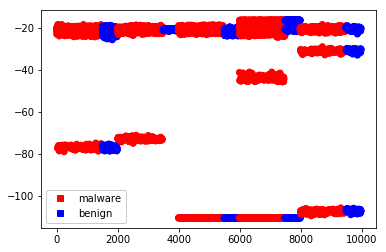

In [3]:
#scatter plot for scores
red = (1, 0, 0)
blue = (0, 0, 1)
color = np.zeros((len(y_test), 3))
for i in range(len(y_test)):
    if y_test[i] == MALWARE_LABEL: color[i] = red
    else: color[i] = blue

colors = ['red', 'blue']
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(2)]
labels = ['malware', 'benign']
plt.legend(handles, labels, loc="best", framealpha=1)

plt.scatter(np.arange(len(y_score)), np.array(y_score), c=color)

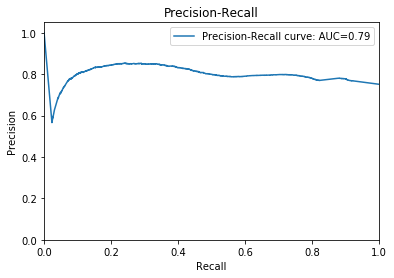

In [4]:
plot.precision_recall(np.array(y_test), np.array(y_score))

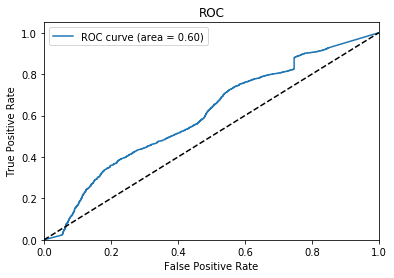

In [5]:
plot.roc(np.array(y_test), np.array(y_score))